In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('GS.csv')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Create lag features (e.g., lag of 1 day)
data['Close_Lag1'] = data['Close'].shift(1)


In [2]:
from sklearn.model_selection import TimeSeriesSplit

# Select features
features = ['Close', 'Close_Lag1']

# Define target variable
target = 'Close'

# Splitting data
split_date = '2020-01-01'
train_data = data[data.index < split_date]
test_data = data[data.index >= split_date]


In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load your dataset
data = pd.read_csv('GS.csv')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Create lag features
data['Close_Lag1'] = data['Close'].shift(1)

# Define features and target variable
features = ['Close_Lag1']
target = 'Close'

# Splitting data
split_date = '2020-01-01'
train_data = data[data.index < split_date]
test_data = data[data.index >= split_date]

# Initialize the imputer with your chosen strategy (e.g., mean, median)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on training data and transform both training and test data
train_data_imputed = imputer.fit_transform(train_data[features])
test_data_imputed = imputer.transform(test_data[features])

# Convert the imputed arrays back to DataFrames
X_train = pd.DataFrame(train_data_imputed, columns=features, index=train_data.index)
y_train = train_data[target]

X_test = pd.DataFrame(test_data_imputed, columns=features, index=test_data.index)
y_test = test_data[target]


In [4]:
# Drop rows with missing values in both X and y
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]



In [5]:
# Check for NaN values in your training data
print(train_data[features].isnull().sum())


Close_Lag1    1
dtype: int64


In [6]:
# Remove rows with NaN values in both X_train and y_train
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]


In [7]:
from sklearn.experimental import enable_hist_gradient_boosting  # Enable experimental modules
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


# Ensure that 'Close' feature is included in test data
X_test = test_data[features]  # Include all relevant features in X_test
y_test = test_data[target]
# Initialize the HistGradientBoostingRegressor model
model = HistGradientBoostingRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate Root Mean Squared Error (RMSE) to evaluate the model's performance
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


c:\Users\ANAM KHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Root Mean Squared Error (RMSE): 75.65527269441772


Root Mean Squared Error (RMSE): 75.65527269441772


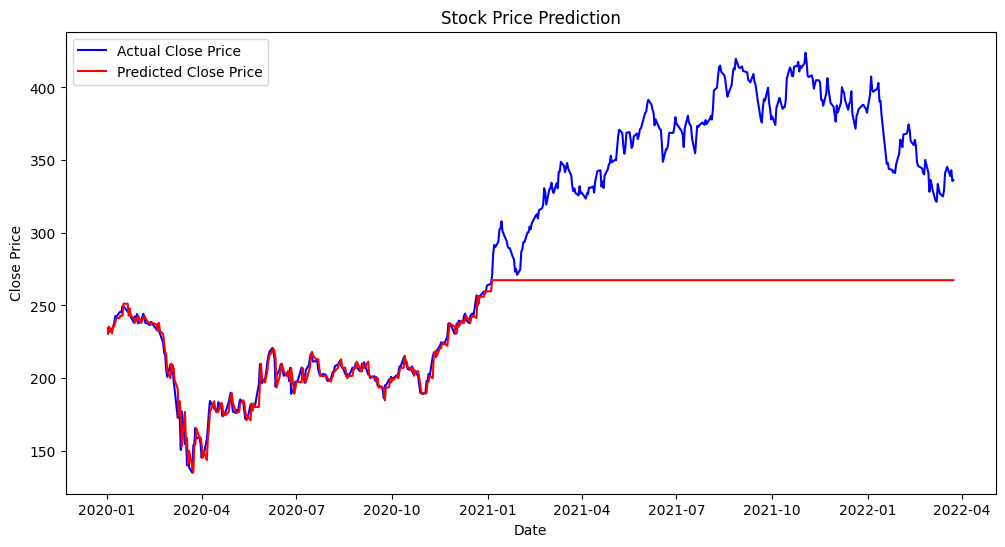

In [8]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate Root Mean Squared Error (RMSE) to evaluate the model's performance
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Visualize the actual vs. predicted stock prices
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label="Actual Close Price", color='blue')
plt.plot(test_data.index, predictions, label="Predicted Close Price", color='red')
plt.legend()
plt.title("Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


c:\Users\ANAM KHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ANAM KHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ANAM KHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ANAM KHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No suppor

Best ARIMA Model - RMSE: 104.68042797499977
Training Time: 20.460122108459473 seconds
Testing Time: 0.024357318878173828 seconds


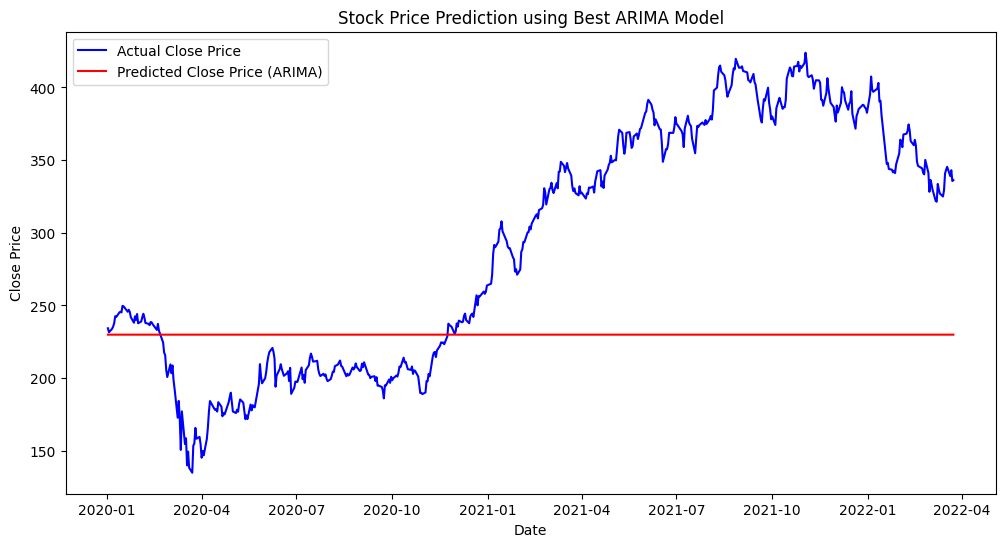

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
import time  # Import the time module

# Load your dataset
data = pd.read_csv('GS.csv')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Define features and target variable
features = ['Close']
target = 'Close'

# Splitting data
split_date = '2020-01-01'
train_data = data[data.index < split_date]
test_data = data[data.index >= split_date]

# Measure training time
start_time = time.time()

# Use auto_arima to perform a grid search for ARIMA parameters
model = auto_arima(train_data[target], seasonal=False, stepwise=True, suppress_warnings=True, 
                   error_action="ignore", max_order=None)

# Get the best ARIMA parameters from the grid search
best_p, best_d, best_q = model.get_params()['order']

# Fit the best ARIMA model to the training data
from statsmodels.tsa.arima.model import ARIMA
best_model = ARIMA(train_data[target], order=(best_p, best_d, best_q))
best_model_fit = best_model.fit()

# Measure training time
training_time = time.time() - start_time

# Measure testing time
start_time = time.time()

# Make predictions on the test data using the best ARIMA model
predictions_arima = best_model_fit.forecast(steps=len(test_data))

# Measure testing time
testing_time = time.time() - start_time

# Calculate RMSE for ARIMA predictions
rmse_arima = np.sqrt(mean_squared_error(test_data[target], predictions_arima))
print(f"Best ARIMA Model - RMSE: {rmse_arima}")
print(f"Training Time: {training_time} seconds")
print(f"Testing Time: {testing_time} seconds")

# Visualize the actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data[target], label="Actual Close Price", color='blue')
plt.plot(test_data.index, predictions_arima, label="Predicted Close Price (ARIMA)", color='red')
plt.legend()
plt.title("Stock Price Prediction using Best ARIMA Model")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()



c:\Users\ANAM KHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ANAM KHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ANAM KHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE for ETS: 104.6363181633979


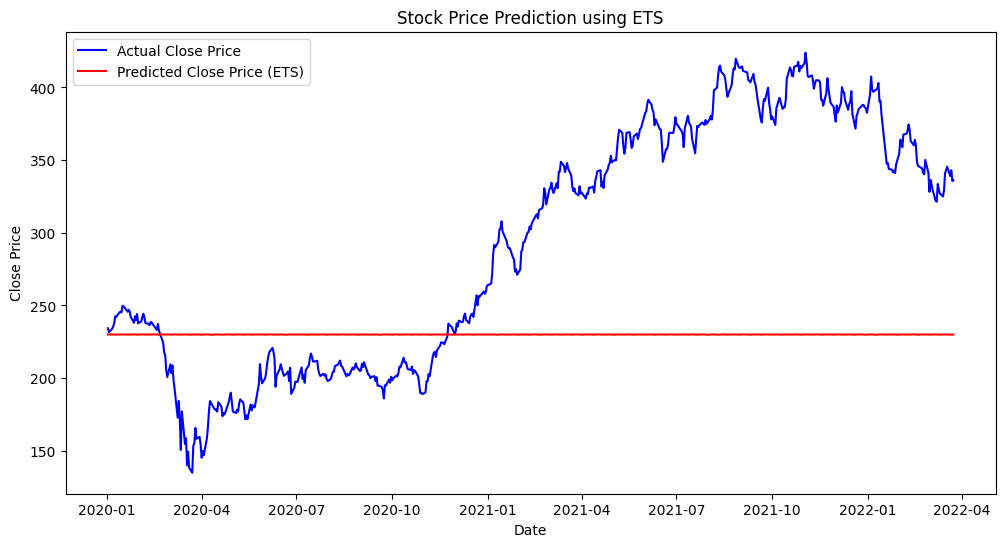

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np

# Load your dataset
data = pd.read_csv('GS.csv')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Rename columns for ETS
data = data.rename(columns={'Date': 'date', 'Close': 'value'})

# Set 'date' as the index
data.set_index('date', inplace=True)

# Splitting data
split_date = '2020-01-01'
train_data = data[data.index < split_date]
test_data = data[data.index >= split_date]

# Initialize and fit ETS model
model_ets = ExponentialSmoothing(train_data['value'], seasonal='add', seasonal_periods=7)  # Adjust seasonal parameters as needed
model_ets_fit = model_ets.fit()

# Make predictions for the test set
predictions_ets = model_ets_fit.forecast(steps=len(test_data))

# Calculate RMSE for ETS predictions
rmse_ets = np.sqrt(mean_squared_error(test_data['value'], predictions_ets))
print(f"RMSE for ETS: {rmse_ets}")

# Plot the actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['value'], label="Actual Close Price", color='blue')
plt.plot(test_data.index, predictions_ets, label="Predicted Close Price (ETS)", color='red')
plt.legend()
plt.title("Stock Price Prediction using ETS")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


Epoch 1/50
82/82 - 7s - loss: 0.0121 - val_loss: 0.0249 - 7s/epoch - 80ms/step
Epoch 2/50
82/82 - 1s - loss: 0.0018 - val_loss: 0.0059 - 1s/epoch - 15ms/step
Epoch 3/50
82/82 - 1s - loss: 0.0015 - val_loss: 0.0034 - 1s/epoch - 15ms/step
Epoch 4/50
82/82 - 1s - loss: 0.0013 - val_loss: 0.0017 - 1s/epoch - 15ms/step
Epoch 5/50
82/82 - 1s - loss: 0.0013 - val_loss: 0.0017 - 1s/epoch - 15ms/step
Epoch 6/50
82/82 - 1s - loss: 0.0012 - val_loss: 0.0017 - 1s/epoch - 16ms/step
Epoch 7/50
82/82 - 1s - loss: 0.0011 - val_loss: 0.0015 - 1s/epoch - 16ms/step
Epoch 8/50
82/82 - 1s - loss: 0.0011 - val_loss: 0.0015 - 1s/epoch - 16ms/step
Epoch 9/50
82/82 - 1s - loss: 0.0010 - val_loss: 0.0018 - 1s/epoch - 16ms/step
Epoch 10/50
82/82 - 1s - loss: 0.0010 - val_loss: 0.0015 - 1s/epoch - 16ms/step
Epoch 11/50
82/82 - 1s - loss: 8.8095e-04 - val_loss: 0.0016 - 1s/epoch - 16ms/step
Epoch 12/50
82/82 - 1s - loss: 8.5906e-04 - val_loss: 0.0019 - 1s/epoch - 16ms/step
Epoch 13/50
82/82 - 1s - loss: 8.3082e-04

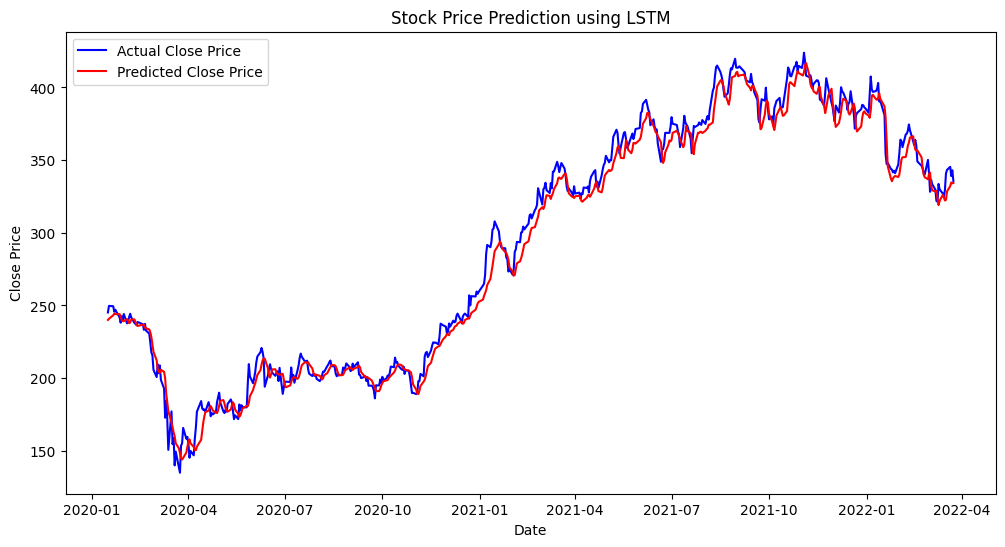

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load your dataset (replace 'your_dataset.csv' with your dataset path)
data = pd.read_csv('GS.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Extract the 'Close' prices as the target variable
target_col = 'Close'
data = data[[target_col]]

# Normalize the data to the range [0, 1]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Split the data into training and test sets
split_date = '2020-01-01'
train_data = data_scaled[data.index < split_date]
test_data = data_scaled[data.index >= split_date]

# Function to create sequences of data for training
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

# Define the sequence length and batch size
seq_length = 10  # Adjust as needed
batch_size = 64

# Create sequences for training
train_sequences = create_sequences(train_data, seq_length)

# Define X_train and y_train
X_train = train_sequences[:, :-1]
y_train = train_sequences[:, -1]

# Create sequences for testing
test_sequences = create_sequences(test_data, seq_length)

# Define X_test and y_test
X_test = test_sequences[:, :-1]
y_test = test_sequences[:, -1]

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)

# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values to their original scale
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE for the predictions
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse}")

# Visualize the actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label="Actual Close Price", color='blue')
plt.plot(data.index[-len(predictions):], predictions, label="Predicted Close Price", color='red')
plt.legend()
plt.title("Stock Price Prediction using LSTM")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()
